# Clustering -Tarea

Para esta tarea, intentaremos usar  Clustering para agrupar universidadesde acuerdo al criterio que usted decida.

___
Usaremos un DataFrame con 777 observaciones en las siguientes 18 variables.

* Private: Un factor con niveles No y Sí que indican universidad privada o pública
* App: Número de aplicaciones recibidas
* Accept: Número de solicitudes aceptadas
* Enroll: Número de nuevos estudiantes matriculados
* Top10perc: Pct. nuevos estudiantes del 10% superior de H.S. clase
* Top25perc: Pct. nuevos estudiantes del 25% superior de H.S. clase
* F.Undergrad: Número de estudiantes de pregrado a tiempo completo
* P.Undergrad: Número de estudiantes universitarios a tiempo parcial
* Outstate: estatal fuera del estado
* Room.Board: Tabla de alojamiento y alimentación.
* Books: Costo estimado del libro
* Personal: Gastos personales estimados personales
* PhD: Pct. de la facultad con doctorado
* Terminal: Pct. de la facultad con título terminal
* S.F.Ratio: Relación estudiante / facultad
* perc.alumni: Pct. ex alumnos que donan
* Expend:  gastos de instrucción por alumno
* Grad.Rate Tasa de graduación

AL FINAL PONER EL MODELO Y LOS CLUSTER CON MEJOR RESULTADO!!
SOLO HAGA EL GRAFICO DE 3D

## Librerias

**Poner la librerías que uso en clase para el tema de clustering**

In [310]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
##
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt


from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import timedcall;

**Leer en el archivo College_Data usando read_csv. y asiganrle como datframe el nombre data**

In [311]:
College = pd.read_csv("College_Data.csv")
College.head(5) # lectura de datos

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [312]:
College.columns # columnas total de dataset

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [313]:
College.shape # dimensiones del dataset

(777, 19)

# Que variables deberiamos usar

Usar modelos de clustering Jerarquico, PAM y Kemans comparar cual es mejor de acuerdo a la métrica de silueta, probando solo con un dataset normalizado con la siguiente lista de variables  ['Apps', 'Accept','F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',  'Terminal','Expend', 'Grad.Rate'] 

* App: Número de aplicaciones recibidas

* Accept: Número de solicitudes aceptadas

* F.Undergrad: Número de estudiantes de pregrado a tiempo completo

* Outstate: estatal fuera del estado

* Room.Board: Tabla de alojamiento y alimentación.

* Terminal: Pct. de la facultad con título terminal

* Expend: gastos de instrucción por alumno

* Grad.Rate Tasa de graduación

* App (Número de aplicaciones recibidas): Indica la cantidad de solicitudes que una institución educativa ha recibido.

* Accept (Número de solicitudes aceptadas): Representa el número de solicitudes que fueron aceptadas por la institución.

* F.Undergrad (Número de estudiantes de pregrado a tiempo completo): Muestra la cantidad de estudiantes de pregrado que están inscritos a tiempo completo.

* Outstate (Estatal fuera del estado): Se refiere a la matrícula o tarifa de matrícula para estudiantes que provienen de fuera del estado.

* Room.Board (Tabla de alojamiento y alimentación): Indica los costos asociados con el alojamiento y la alimentación en el campus.

* Terminal (Pct. de la facultad con título terminal): Representa el porcentaje de miembros de la facultad que tienen un título terminal, lo que generalmente significa un título de doctorado.

* Expend (Gastos de instrucción por alumno): Refleja los gastos de la institución en instrucción divididos por el número de estudiantes.

* Grad.Rate (Tasa de graduación): Indica la proporción de estudiantes que se gradúan dentro de un período de tiempo específico en relación con la cohorte inicial.

In [314]:
College=College.dropna()
College=College[['Unnamed: 0', 'Apps', 'Accept', 'F.Undergrad', 
                 'P.Undergrad', 'Outstate', 'Room.Board', 'Terminal', 
                 'Expend', 'Grad.Rate']]

College.head(10) # elimnar los nas y conservar solo las columnas solicitadas 

,Unnamed: 0,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,2885,537,7440,3300,78,7041,60
1,Adelphi University,2186,1924,2683,1227,12280,6450,30,10527,56
2,Adrian College,1428,1097,1036,99,11250,3750,66,8735,54
3,Agnes Scott College,417,349,510,63,12960,5450,97,19016,59
4,Alaska Pacific University,193,146,249,869,7560,4120,72,10922,15
5,Albertson College,587,479,678,41,13500,3335,73,9727,55
6,Albertus Magnus College,353,340,416,230,13290,5720,93,8861,63
7,Albion College,1899,1720,1594,32,13868,4826,100,11487,73
8,Albright College,1038,839,973,306,15595,4400,84,11644,80
9,Alderson-Broaddus College,582,498,799,78,10468,3380,41,8991,52


In [315]:
College.shape # dimiensiones del nuevo dataframe

(777, 10)

In [316]:
College.iloc[:, 0].describe()

count                              777
unique                             777
top       Abilene Christian University
freq                                 1
Name: Unnamed: 0, dtype: object

In [317]:
College.columns

Index(['Unnamed: 0', 'Apps', 'Accept', 'F.Undergrad', 'P.Undergrad',
       'Outstate', 'Room.Board', 'Terminal', 'Expend', 'Grad.Rate'],
      dtype='object')

In [318]:
#College.index =College.iloc[:,0]
Collegec = College.drop(College.columns[0], axis=1)
Collegec.head(5)

,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate
0,1660,1232,2885,537,7440,3300,78,7041,60
1,2186,1924,2683,1227,12280,6450,30,10527,56
2,1428,1097,1036,99,11250,3750,66,8735,54
3,417,349,510,63,12960,5450,97,19016,59
4,193,146,249,869,7560,4120,72,10922,15


In [319]:
#College['Private'].value_counts()
## Filtrar columnas que son de tipo 'object' (categóricas)
#cols_cat = College[cols].select_dtypes(['object']).columns.tolist()
#cols_cat
#if College.index.name in cols_cat:
#    cols_cat.remove(College.index.name)
#cols_cat
##label encoder de Private
#le = preprocessing.LabelEncoder()
#le.fit(list(College['Private']))
## Transformar los valores no nulos en la columna con el LabelEncoder ajustado
#College['Private'] = le.transform(College['Private'])
#College['Private'].value_counts()
#College.index =College.iloc[:,0]
#Collegec = College.drop(College.columns[0], axis=1)

### Escalado y Implementación: detección de valores atípicos

In [320]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(Collegec) 

In [321]:
scaler

StandardScaler()

### Use  Estadarización o Normalización en los datos y probar con los 3 modelos (jerarquicos, kmedios, kmeans),  para ver cual es mejor con la métrica de silueta (poner el resultado final)

In [322]:
standarizar = scaler.transform(Collegec)
standarizar1 = pd.DataFrame(standarizar,columns=list(Collegec.columns))# sclar los datos 
zscore_df = standarizar1
zscore_df.head(10)

,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.168116,-0.209207,-0.746356,-0.964905,-0.115729,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.209788,0.244307,0.457496,1.909208,-3.378176,0.166110,-0.551262
2,-0.406866,-0.376318,-0.549565,-0.497090,0.201305,-0.554317,-0.931341,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.658079,-0.520752,0.626633,0.996791,1.175657,1.792851,-0.376504
4,-0.726176,-0.764555,-0.711924,0.009005,-0.716508,-0.216723,-0.523535,0.241803,-2.939613
5,-0.624307,-0.628611,-0.623421,-0.535212,0.760947,-0.932970,-0.455567,0.012806,-0.609514
6,-0.684808,-0.685356,-0.677472,-0.410988,0.708713,1.243144,0.903786,-0.153145,-0.143495
7,-0.285088,-0.121984,-0.434450,-0.541127,0.852479,0.427443,1.379560,0.350074,0.439030
8,-0.507700,-0.481644,-0.562562,-0.361036,1.282036,0.038754,0.292077,0.380160,0.846798
9,-0.625600,-0.620854,-0.598459,-0.510893,0.006798,-0.891911,-2.630532,-0.128233,-0.784272


In [323]:
zscore_df.index

RangeIndex(start=0, stop=777, step=1)

In [324]:
zscore_df.index=College.index

In [325]:
zscore_df

,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.168116,-0.209207,-0.746356,-0.964905,-0.115729,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.209788,0.244307,0.457496,1.909208,-3.378176,0.166110,-0.551262
2,-0.406866,-0.376318,-0.549565,-0.497090,0.201305,-0.554317,-0.931341,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.658079,-0.520752,0.626633,0.996791,1.175657,1.792851,-0.376504
4,-0.726176,-0.764555,-0.711924,0.009005,-0.716508,-0.216723,-0.523535,0.241803,-2.939613
...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.126030,0.771435,-0.906289,-0.417455,-1.339146,-0.994781,-1.483301
773,-0.269575,-0.087284,-0.175543,0.165435,0.268462,0.549707,-0.319632,-0.090290,1.021555
774,-0.233895,-0.042377,-0.187095,-0.453053,-0.880670,-0.143730,-0.319632,-0.256241,-0.959029
775,1.991711,0.177256,0.312977,-0.507606,2.337894,1.963953,1.107689,5.887971,1.953595


# Algoritmos No Supervisados

## Jeraquico

## Generar el Dendograma

Tomar en cuenta el corte  para ir probando entre 3 a 5 cluster's y evaluar cuales mejor como se hizo en clase

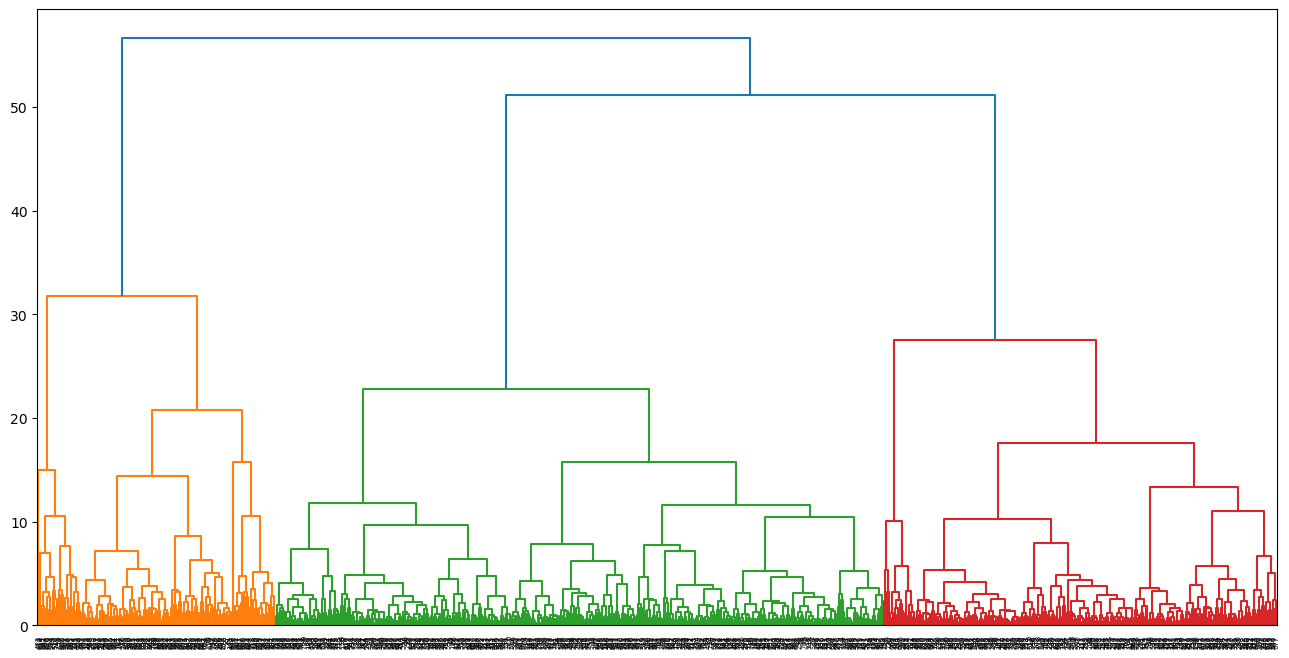

In [326]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
seed = 16
np.random.seed(seed)
linked = linkage(zscore_df,method = 'ward')
labelList = range(1, 11)
plt.figure(figsize=(16, 8))  
dendrogram(linked)
plt.show()  

In [327]:
zscore_df.shape

(777, 9)

## USE EL MODELO JERARQUICO ( SEED = 16)

### Con 3 Clusters

In [328]:
from sklearn.cluster import AgglomerativeClustering
seed = 16
np.random.seed(seed)
cluster_Ag3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')   # metodo jerarquico
cluster_Ag3.fit_predict(zscore_df)   ## Recordar que aca se reemplaza su dataframe

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0,
       2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 2,
       2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,

In [329]:
label_ag3 = pd.DataFrame(cluster_Ag3.labels_,columns= ['Cluster'])
cluster_Jerarq3 = pd.concat([College,label_ag3['Cluster']], axis=1)
#cluster_Jerarq.index =cluster_Jerarq.iloc[:,0]
#cluster_Jerarq = cluster_Jerarq.drop(cluster_Jerarq.columns[0], axis=1)
cluster_Jerarq3.head(5)

,Unnamed: 0,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate,Cluster
0,Abilene Christian University,1660,1232,2885,537,7440,3300,78,7041,60,2
1,Adelphi University,2186,1924,2683,1227,12280,6450,30,10527,56,2
2,Adrian College,1428,1097,1036,99,11250,3750,66,8735,54,2
3,Agnes Scott College,417,349,510,63,12960,5450,97,19016,59,1
4,Alaska Pacific University,193,146,249,869,7560,4120,72,10922,15,2


In [330]:
cluster_Jerarq3.Cluster.value_counts()

Cluster
2    381
1    247
0    149
Name: count, dtype: int64

### Con 4 Clusters

In [331]:
from sklearn.cluster import AgglomerativeClustering
seed = 16
np.random.seed(seed)
cluster_Ag4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster_Ag4.fit_predict(zscore_df)   ## Recordar que aca se reemplaza su dataframe

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1,
       2, 3, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 3, 0, 1, 0, 2, 0, 2,
       2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0,
       1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 1, 2, 3, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0,
       2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 3, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 2,
       2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2,

In [332]:
label_ag4 = pd.DataFrame(cluster_Ag4.labels_,columns= ['Cluster'])
cluster_Jerarq4 = pd.concat([College,label_ag4['Cluster']], axis=1)
#cluster_Jerarq.index =cluster_Jerarq.iloc[:,0]
#cluster_Jerarq = cluster_Jerarq.drop(cluster_Jerarq.columns[0], axis=1)
cluster_Jerarq4.head(5)

,Unnamed: 0,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate,Cluster
0,Abilene Christian University,1660,1232,2885,537,7440,3300,78,7041,60,2
1,Adelphi University,2186,1924,2683,1227,12280,6450,30,10527,56,2
2,Adrian College,1428,1097,1036,99,11250,3750,66,8735,54,2
3,Agnes Scott College,417,349,510,63,12960,5450,97,19016,59,0
4,Alaska Pacific University,193,146,249,869,7560,4120,72,10922,15,2


In [333]:
cluster_Jerarq4.Cluster.value_counts()

Cluster
2    381
0    247
1    122
3     27
Name: count, dtype: int64

### Con  5 Clusters

In [334]:
from sklearn.cluster import AgglomerativeClustering
seed = 16
np.random.seed(seed)
cluster_Ag5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster_Ag5.fit_predict(zscore_df)   ## Recordar que aca se reemplaza su dataframe

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 4, 1,
       0, 3, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 3, 2, 1, 2, 0, 2, 0,
       0, 0, 0, 1, 4, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 4,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 4, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 4, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 2,
       1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 1, 0, 3, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 4, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 0, 0, 0, 2, 4, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 3, 0, 2, 1, 2, 1, 0, 0, 0, 2, 4, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,

In [335]:
label_ag5 = pd.DataFrame(cluster_Ag5.labels_,columns= ['Cluster'])
cluster_Jerarq5 = pd.concat([College,label_ag5['Cluster']], axis=1)
#cluster_Jerarq.index =cluster_Jerarq.iloc[:,0]
#cluster_Jerarq = cluster_Jerarq.drop(cluster_Jerarq.columns[0], axis=1)
cluster_Jerarq5.head(5)

,Unnamed: 0,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate,Cluster
0,Abilene Christian University,1660,1232,2885,537,7440,3300,78,7041,60,0
1,Adelphi University,2186,1924,2683,1227,12280,6450,30,10527,56,0
2,Adrian College,1428,1097,1036,99,11250,3750,66,8735,54,0
3,Agnes Scott College,417,349,510,63,12960,5450,97,19016,59,2
4,Alaska Pacific University,193,146,249,869,7560,4120,72,10922,15,0


In [336]:
cluster_Jerarq5.Cluster.value_counts()

Cluster
0    381
2    227
1    122
3     27
4     20
Name: count, dtype: int64

## Visualizacion en 3D
Tener cuidado que los ejes debe de tener los siguientes nombres zscore_df.Apps, zscore_df.Accept, zscore_df.Outstate ; dado que tiene que se columnas del dataset que estamos usando

### Con 3 clusters

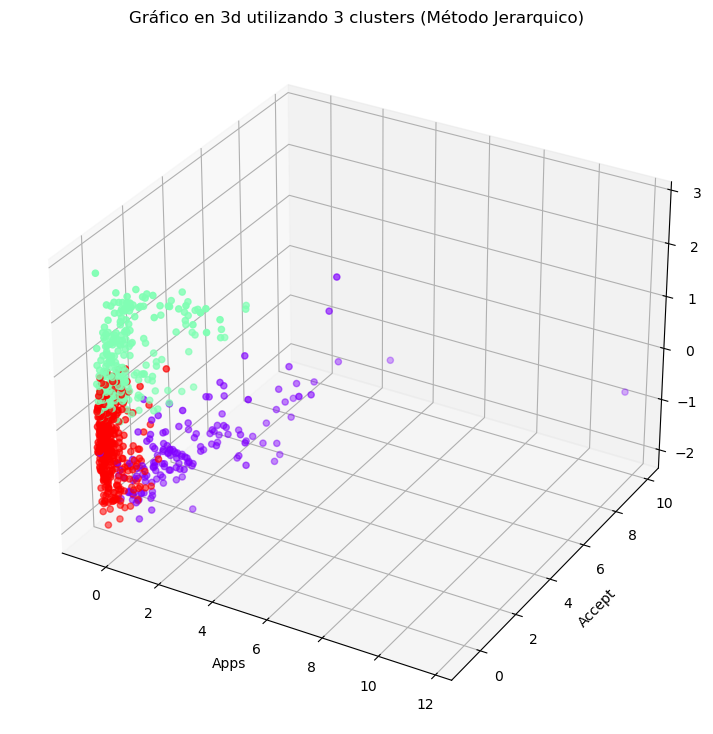

In [337]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (18,9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(zscore_df.Apps,
           zscore_df.Accept,
           zscore_df.Outstate,
           c= cluster_Ag3.labels_ ,
           cmap='rainbow')
ax.set_xlabel('Apps')
ax.set_ylabel('Accept')
ax.set_zlabel('Outstate')
ax.set_title('Gráfico en 3d utilizando 3 clusters (Método Jerarquico)')
plt.show()

### Con 4 clusters

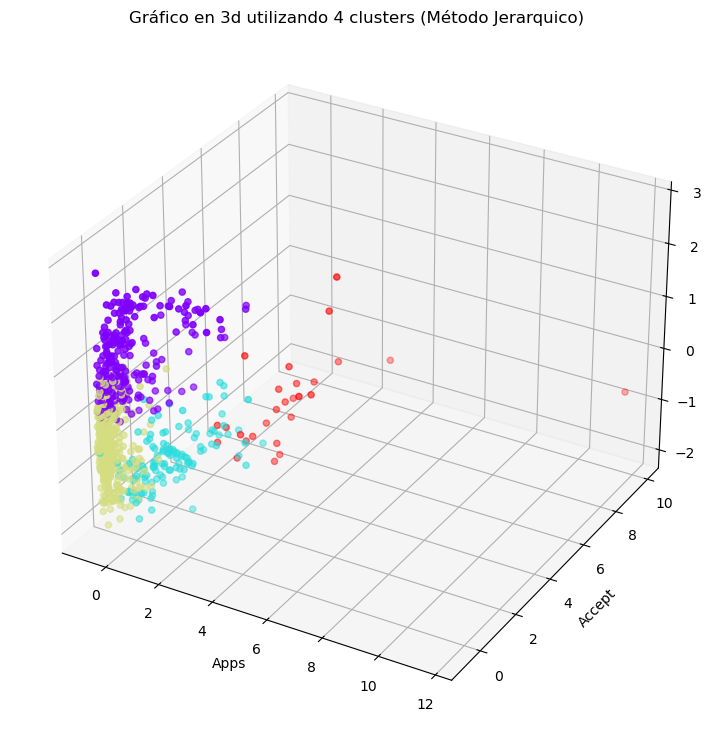

In [338]:
plt.rcParams['figure.figsize'] = (18,9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(zscore_df.Apps,
           zscore_df.Accept,
           zscore_df.Outstate,
           c=cluster_Ag4.labels_ ,
           cmap='rainbow')

ax.set_xlabel('Apps')
ax.set_ylabel('Accept')
ax.set_zlabel('Outstate')
ax.set_title('Gráfico en 3d utilizando 4 clusters (Método Jerarquico)')
plt.show()


### Con 5 clusters

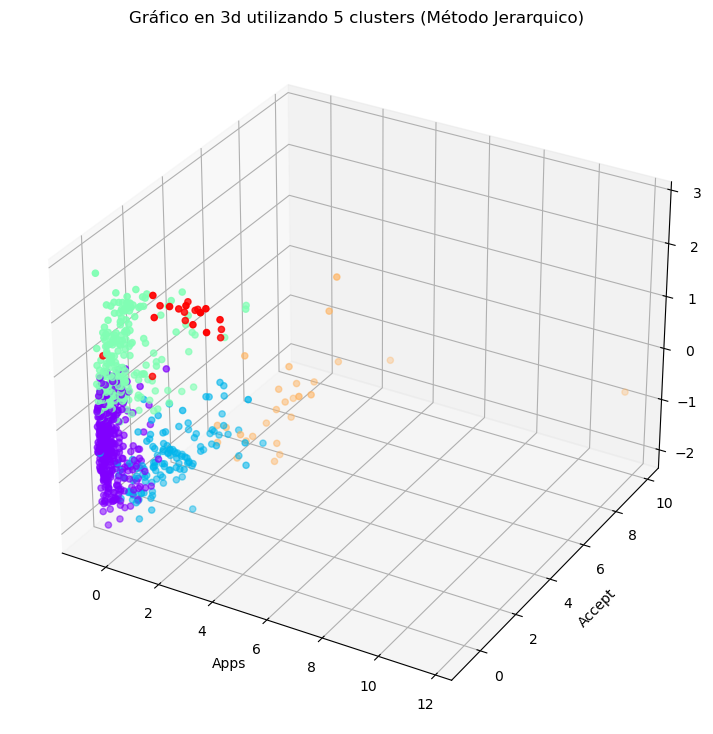

In [339]:
plt.rcParams['figure.figsize'] = (18,9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(zscore_df.Apps,
           zscore_df.Accept,
           zscore_df.Outstate, 
           c=cluster_Ag5.labels_ ,
           cmap='rainbow')

ax.set_xlabel('Apps')
ax.set_ylabel('Accept')
ax.set_zlabel('Outstate')

ax.set_title('Gráfico en 3d utilizando 5 clusters (Método Jerarquico)')
plt.show()


## MÉTRICA DE SILUETA PROBAR Y COMPARAR CON 3 ,4 Y 5 (CLUSTER JERARQUICO)

In [340]:
from sklearn.metrics import silhouette_score
silhouette_score(Collegec.values, cluster_Ag3.labels_, metric='euclidean')

0.3101869190586908

In [341]:
from sklearn.metrics import silhouette_score
silhouette_score(Collegec.values, cluster_Ag4.labels_, metric='euclidean')

0.3152690227559717

In [342]:
from sklearn.metrics import silhouette_score
silhouette_score(Collegec.values, cluster_Ag5.labels_, metric='euclidean')

0.325258390504183

# **La metrica de silueta mide cuán similar es un objeto a su propio grupo (cohesión) en comparación con otros grupos (separación). El valor del índice de silhouette varía entre -1 y 1, donde un valor más alto indica una mejor calidad de agrupamiento."**

# Segun la metrica de silueta obtenidos con 3,4 y 5 utilizando el metodo de cluster jerarquico  el mejor número de clústeres para el conjunto de datos es 5.

# USE KMEDOIDES CON P.A.M


Debemos de fijar la cantidad de cluster por ejemplo  kmedoids(zscore_df1.values, [3, 6, 4],random_state=16), Es decir [3, 6, 4] esto representa  3 cluster de forma aleatoria y si queremos probar mas cluster para comparanos con jearquico en caso este tenga más cluster solo agregamos mas valores a lista de forma aleatoria que no sea mayor a la cantidad total del dataset y que no se repita (elija las que guste).

###  Kmedoides con P.A.M

### Con 3 clusters

In [343]:
from pyclustering.utils import timedcall;
from pyclustering.cluster.kmedoids import kmedoids;
seed = 16 # con esto definimos la semilla o con random_state
np.random.seed(seed)

kmedoids_instance = kmedoids(zscore_df.values, [3, 6, 4],random_state=16); ## para probar mas cluster solo agregar en
# la lista [3, 6, 4] aca seria para 3 cluster si quieres 
#4 agrega [3, 6, 4, 10] un valor cualesquiera por que son aleatorios
#se refiere a los índices  iniciales de los medoides en el conjunto de datos estos son aleatorios 

#llama al método clarans 'process' para implementar el algoritmo
(ticks, result) = timedcall(kmedoids_instance.process);
print("Execution time : ", ticks, "\n");
#devuelve los clusters
clusters_Kmed = kmedoids_instance.get_clusters();
#devuelve los mediods 
medoids = kmedoids_instance.get_medoids();
print("Índice de los puntos que están en un cluster : ",clusters_Kmed)
print("El índice de medoides que el algoritmo encontró mejor :", medoids)


Execution time :  0.3619652999987011 

Índice de los puntos que están en un cluster :  [[23, 27, 59, 61, 69, 78, 118, 141, 176, 201, 203, 218, 223, 269, 274, 277, 279, 288, 324, 365, 366, 407, 412, 418, 419, 420, 432, 445, 461, 483, 510, 536, 560, 561, 562, 563, 581, 605, 606, 607, 610, 611, 614, 619, 620, 623, 624, 626, 628, 633, 634, 637, 640, 642, 647, 649, 651, 652, 657, 661, 662, 664, 667, 675, 676, 677, 683, 684, 685, 686, 691, 693, 694, 700, 701, 711, 713, 727, 743], [3, 6, 7, 8, 10, 11, 13, 16, 20, 26, 29, 31, 36, 37, 40, 44, 47, 48, 60, 62, 64, 70, 71, 72, 74, 83, 86, 87, 91, 94, 96, 106, 107, 108, 114, 115, 117, 120, 122, 123, 124, 127, 130, 131, 137, 138, 139, 140, 144, 149, 151, 152, 158, 159, 162, 163, 164, 171, 172, 174, 175, 184, 185, 186, 191, 196, 200, 205, 213, 219, 221, 225, 227, 230, 237, 239, 240, 242, 243, 244, 249, 250, 251, 254, 255, 256, 257, 258, 259, 268, 270, 276, 278, 283, 284, 287, 292, 296, 298, 299, 301, 306, 307, 308, 309, 313, 318, 326, 327, 329, 331, 

In [344]:
import pandas as pd
label = pd.DataFrame()
for i in range(3):  # Esto es para 3 cluster si quiero 4 cambio aca el valor anda mas  
    print(i)
    a = pd.DataFrame(clusters_Kmed[i],columns = ['Index']) 
    a['Cluster'] = i
    label = pd.concat([label, a], ignore_index=True)#True

0
1
2


In [345]:
label_f = label.sort_values(by ='Index').reset_index(drop='true')
cluster_Med = pd.concat([College,label_f['Cluster']], axis=1)
cluster_Med.head(5)

,Unnamed: 0,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate,Cluster
0,Abilene Christian University,1660,1232,2885,537,7440,3300,78,7041,60,2
1,Adelphi University,2186,1924,2683,1227,12280,6450,30,10527,56,2
2,Adrian College,1428,1097,1036,99,11250,3750,66,8735,54,2
3,Agnes Scott College,417,349,510,63,12960,5450,97,19016,59,1
4,Alaska Pacific University,193,146,249,869,7560,4120,72,10922,15,2


In [346]:
from sklearn.metrics import silhouette_score
kmpam3c=silhouette_score(Collegec.values, cluster_Med.Cluster, metric='euclidean')
kmpam3c

0.35873199689416224

## Con 4 clusters

In [347]:
from pyclustering.utils import timedcall;
from pyclustering.cluster.kmedoids import kmedoids;
seed = 16 # con esto definimos la semilla o con random_state
np.random.seed(seed)

kmedoids_instance = kmedoids(zscore_df.values, [3, 6, 4,10],random_state=16); ## para probar mas cluster solo agregar en
# la lista [3, 6, 4] aca seria para 3 cluster si quieres 
#4 agrega [3, 6, 4, 10] un valor cualesquiera por que son aleatorios
#se refiere a los índices  iniciales de los medoides en el conjunto de datos estos son aleatorios 

#llama al método clarans 'process' para implementar el algoritmo
(ticks, result) = timedcall(kmedoids_instance.process);
print("Execution time : ", ticks, "\n");
#devuelve los clusters
clusters_Kmed = kmedoids_instance.get_clusters();
#devuelve los mediods 
medoids = kmedoids_instance.get_medoids();
print("Índice de los puntos que están en un cluster : ",clusters_Kmed)
print("El índice de medoides que el algoritmo encontró mejor :", medoids)


Execution time :  0.6147980999958236 

Índice de los puntos que están en un cluster :  [[16, 20, 59, 60, 64, 70, 87, 144, 158, 174, 191, 219, 221, 250, 251, 284, 309, 354, 407, 424, 428, 459, 471, 528, 576, 597, 609, 636, 663, 669, 677, 692, 708, 710, 720, 728, 733, 753, 763, 775], [0, 1, 2, 4, 5, 9, 14, 15, 17, 18, 19, 22, 24, 25, 28, 30, 32, 33, 35, 41, 42, 43, 45, 46, 49, 50, 51, 52, 53, 55, 56, 57, 58, 65, 66, 67, 76, 80, 81, 82, 85, 89, 90, 92, 93, 97, 98, 99, 101, 104, 105, 110, 111, 112, 113, 116, 119, 125, 126, 128, 133, 135, 136, 142, 143, 145, 146, 147, 148, 153, 154, 155, 156, 160, 161, 165, 166, 167, 168, 169, 170, 173, 177, 178, 179, 180, 182, 183, 188, 189, 192, 193, 194, 195, 197, 198, 199, 202, 204, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 220, 224, 226, 229, 231, 232, 234, 235, 236, 238, 245, 246, 247, 248, 252, 253, 261, 262, 263, 264, 265, 267, 271, 275, 280, 281, 282, 285, 286, 289, 290, 291, 293, 295, 297, 300, 302, 303, 304, 305, 310, 312, 314, 315, 

In [348]:
import pandas as pd
label = pd.DataFrame()
for i in range(4):  # Esto es para 3 cluster si quiero 4 cambio aca el valor anda mas  
    print(i)
    a = pd.DataFrame(clusters_Kmed[i],columns = ['Index']) 
    a['Cluster'] = i
    label = pd.concat([label, a], ignore_index=True)#True

0
1
2
3


In [349]:
label_f = label.sort_values(by ='Index').reset_index(drop='true')
cluster_Med = pd.concat([College,label_f['Cluster']], axis=1)
cluster_Med.head(5)

,Unnamed: 0,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate,Cluster
0,Abilene Christian University,1660,1232,2885,537,7440,3300,78,7041,60,1
1,Adelphi University,2186,1924,2683,1227,12280,6450,30,10527,56,1
2,Adrian College,1428,1097,1036,99,11250,3750,66,8735,54,1
3,Agnes Scott College,417,349,510,63,12960,5450,97,19016,59,3
4,Alaska Pacific University,193,146,249,869,7560,4120,72,10922,15,1


In [350]:
from sklearn.metrics import silhouette_score
kmpam4c=silhouette_score(Collegec.values, cluster_Med.Cluster, metric='euclidean')
kmpam4c

0.2932454710843919

## Con 5 clusters

In [351]:
from pyclustering.utils import timedcall;
from pyclustering.cluster.kmedoids import kmedoids;
seed = 16 # con esto definimos la semilla o con random_state
np.random.seed(seed)

kmedoids_instance = kmedoids(zscore_df.values, [3, 6, 4,10,16],random_state=16); ## para probar mas cluster solo agregar en
# la lista [3, 6, 4] aca seria para 3 cluster si quieres 
#4 agrega [3, 6, 4, 10] un valor cualesquiera por que son aleatorios
#se refiere a los índices  iniciales de los medoides en el conjunto de datos estos son aleatorios 

#llama al método clarans 'process' para implementar el algoritmo
(ticks, result) = timedcall(kmedoids_instance.process);
print("Execution time : ", ticks, "\n");
#devuelve los clusters
clusters_Kmed = kmedoids_instance.get_clusters();
#devuelve los mediods 
medoids = kmedoids_instance.get_medoids();
print("Índice de los puntos que están en un cluster : ",clusters_Kmed)
print("El índice de medoides que el algoritmo encontró mejor :", medoids)


Execution time :  0.8235077999997884 

Índice de los puntos que están en un cluster :  [[21, 27, 39, 61, 69, 78, 79, 102, 103, 104, 118, 125, 141, 142, 176, 177, 181, 201, 206, 218, 222, 223, 233, 257, 269, 273, 279, 281, 288, 303, 324, 325, 340, 345, 369, 375, 382, 383, 385, 401, 411, 415, 417, 419, 420, 427, 436, 440, 457, 465, 466, 482, 485, 489, 508, 520, 530, 533, 536, 558, 561, 563, 564, 565, 566, 567, 568, 569, 570, 571, 573, 583, 585, 602, 603, 604, 607, 610, 622, 624, 626, 628, 632, 635, 638, 641, 642, 644, 647, 649, 652, 653, 654, 655, 656, 657, 658, 659, 661, 662, 675, 678, 679, 680, 683, 684, 686, 691, 695, 698, 699, 701, 702, 711, 727, 738, 746], [23, 59, 203, 274, 277, 365, 366, 407, 412, 418, 432, 445, 461, 483, 510, 560, 562, 581, 605, 606, 611, 614, 619, 620, 623, 633, 634, 637, 640, 651, 664, 667, 676, 677, 685, 693, 694, 700, 713, 743], [0, 1, 2, 4, 5, 9, 14, 17, 18, 19, 22, 25, 28, 30, 32, 33, 41, 43, 45, 46, 49, 50, 51, 52, 53, 55, 56, 57, 58, 66, 67, 81, 82, 85, 8

In [352]:
import pandas as pd
label = pd.DataFrame()
for i in range(5):  # Esto es para 3 cluster si quiero 4 cambio aca el valor anda mas  
    print(i)
    a = pd.DataFrame(clusters_Kmed[i],columns = ['Index']) 
    a['Cluster'] = i
    label = pd.concat([label, a], ignore_index=True)#True

0
1
2
3
4


In [353]:
label_f = label.sort_values(by ='Index').reset_index(drop='true')
cluster_Med = pd.concat([College,label_f['Cluster']], axis=1)
cluster_Med.head(5)

,Unnamed: 0,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate,Cluster
0,Abilene Christian University,1660,1232,2885,537,7440,3300,78,7041,60,2
1,Adelphi University,2186,1924,2683,1227,12280,6450,30,10527,56,2
2,Adrian College,1428,1097,1036,99,11250,3750,66,8735,54,2
3,Agnes Scott College,417,349,510,63,12960,5450,97,19016,59,3
4,Alaska Pacific University,193,146,249,869,7560,4120,72,10922,15,2


In [354]:
from sklearn.metrics import silhouette_score
kmpam5c=silhouette_score(Collegec.values, cluster_Med.Cluster, metric='euclidean')
kmpam5c

0.23031190945727523

## VISUALIZACION EN 3D

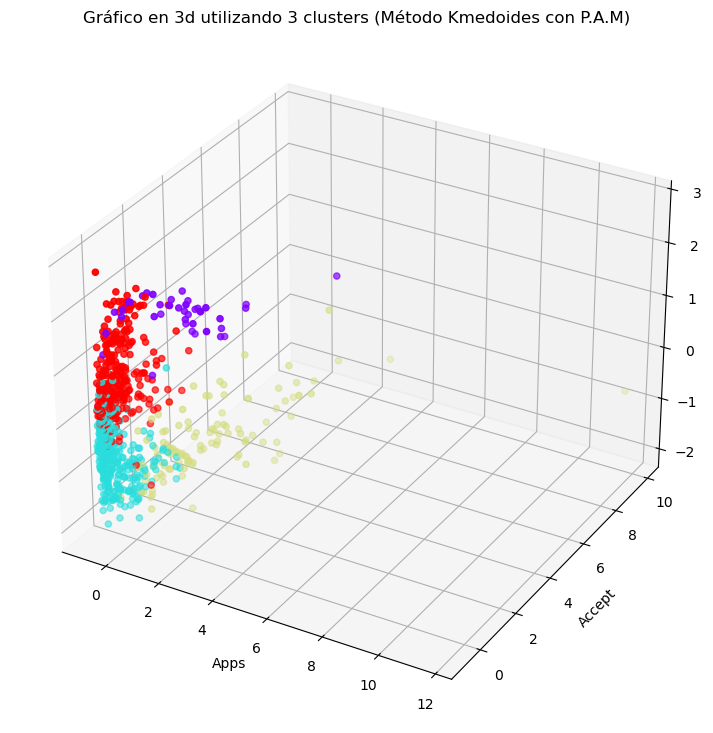

In [355]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (18,9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(zscore_df.Apps,
           zscore_df.Accept,
           zscore_df.Outstate, 
           c=cluster_Med3c.Cluster ,#con 3 clusters
           cmap='rainbow')

ax.set_xlabel('Apps')
ax.set_ylabel('Accept')
ax.set_zlabel('Outstate')

ax.set_title('Gráfico en 3d utilizando 3 clusters (Método Kmedoides con P.A.M)')

plt.show()



## MÉTRICA DE SILUETA PROBAR Y COMPARAR CON 3 ,4 Y 5 CLUSTER (METODO KMEDOID CON PAM)

In [356]:
kmpam3c  # con 3 clusters

0.35873199689416224

In [357]:
kmpam4c # con 4 clusters

0.2932454710843919

In [358]:
kmpam5c # con 5  clusters

0.23031190945727523

# Segun la metrica de silueta obtenidos con 3,4 y 5 utilizando el metodo de cluster Kmedoids con PAM  el mejor número de clústeres para el conjunto de datos es 3.

## USE CON KMEANS (RANDOM_STATE 16)

## K-means

## K-means  con 3 clusters

In [359]:
from sklearn.cluster import KMeans
kmeans3c = KMeans(n_clusters=3,random_state=16)
kmeans3c.fit(zscore_df.values)
centroids3c = kmeans3c.cluster_centers_
print("The index of kemans that algorithm found to be best :", kmeans3c.labels_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The index of kemans that algorithm found to be best : [2 2 2 0 2 2 0 0 0 2 0 0 2 0 2 2 0 2 2 2 0 1 2 1 2 2 0 1 2 0 2 0 2 2 2 2 0
 0 0 2 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 2 2 2 2 1 0 0 0 2
 0 0 2 2 1 1 2 2 2 0 2 2 0 0 2 2 2 0 2 2 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 2 2
 2 2 2 0 0 2 0 1 2 0 2 0 0 0 2 2 0 2 2 0 0 0 2 2 2 2 0 0 0 0 1 2 2 0 2 2 2
 2 0 2 0 0 2 2 2 2 2 0 0 2 2 0 0 0 2 2 2 2 2 2 0 0 2 0 0 1 2 2 2 2 2 2 2 0
 0 0 0 2 2 2 0 2 2 2 2 0 2 2 2 0 1 2 1 2 0 2 2 2 2 2 2 2 0 2 2 2 2 1 0 2 0
 1 1 2 0 2 0 2 2 0 2 2 2 2 2 2 0 2 0 0 2 0 0 0 2 2 2 2 0 0 0 2 2 0 0 0 0 0
 0 0 2 2 2 2 2 0 2 0 1 0 2 2 2 1 2 0 1 0 1 2 2 2 0 0 2 2 0 1 2 2 2 0 2 0 2
 0 2 0 0 2 0 2 2 2 2 0 0 0 0 2 0 2 0 2 2 2 0 0 2 2 2 2 2 1 2 0 0 0 0 0 0 0
 2 0 2 2 2 0 0 2 2 0 0 0 2 0 2 0 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 0 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0 2
 1 2 0 2 2 1 2 0 2 0 2 1 1 1 2 2 2 0 0 2 2 0 0 0 0 1 0 2 2 1 0 2 2 1 0 2 2
 2 1 0 2 2 0 2 2 2 0 2 2 0 2 0 0 0 1 2 2 0 2 2

In [360]:
label_km3c = pd.DataFrame(kmeans3c.labels_,columns= ['Cluster'])
cluster_kmeans3c = pd.concat([College,label_km3c['Cluster']], axis=1)
cluster_kmeans3c

,Unnamed: 0,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate,Cluster
0,Abilene Christian University,1660,1232,2885,537,7440,3300,78,7041,60,2
1,Adelphi University,2186,1924,2683,1227,12280,6450,30,10527,56,2
2,Adrian College,1428,1097,1036,99,11250,3750,66,8735,54,2
3,Agnes Scott College,417,349,510,63,12960,5450,97,19016,59,0
4,Alaska Pacific University,193,146,249,869,7560,4120,72,10922,15,2
...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,3089,2029,6797,3900,60,4469,40,2
773,Xavier University,1959,1805,2849,1107,11520,4960,75,9189,83,0
774,Xavier University of Louisiana,2097,1915,2793,166,6900,4200,75,8323,49,2
775,Yale University,10705,2453,5217,83,19840,6510,96,40386,99,0


In [361]:
cluster_kmeans3c.Cluster.value_counts()

Cluster
2    418
0    275
1     84
Name: count, dtype: int64

## K-means con 4 clusters

In [362]:
from sklearn.cluster import KMeans

kmeans4c = KMeans(n_clusters=4,random_state=16)
kmeans4c.fit(zscore_df.values)
centroids4c = kmeans4c.cluster_centers_
print("The index of kemans that algorithm found to be best :", kmeans4c.labels_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The index of kemans that algorithm found to be best : [3 3 3 0 3 3 0 0 0 3 0 0 0 0 3 0 1 3 3 3 1 2 3 2 0 3 0 2 3 0 3 0 3 3 0 0 1
 1 0 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 0 3 3 3 3 2 1 2 0 0 1 0 3 3 0 2 1 1 1 0
 0 0 0 0 2 2 0 3 3 0 0 3 1 1 0 3 0 1 0 3 0 0 0 3 3 0 0 0 3 3 3 3 0 0 0 0 0
 3 3 3 1 0 3 0 2 3 0 0 1 1 0 3 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 2 3 0 1 3 3 3
 3 1 0 0 1 3 3 3 3 0 1 1 3 3 0 0 1 3 3 3 3 3 3 0 1 0 1 0 2 3 3 3 3 3 0 3 0
 0 0 0 3 3 0 1 3 0 3 3 1 3 3 3 0 2 3 2 3 1 3 3 0 0 3 3 3 0 3 3 0 3 2 1 3 1
 2 2 3 1 3 0 0 3 1 3 3 3 0 3 3 1 3 0 0 0 1 0 0 3 3 3 3 0 1 1 3 0 0 0 1 0 0
 0 0 0 3 3 3 3 0 3 0 2 0 0 0 3 2 3 0 2 0 2 3 3 3 0 1 3 3 0 2 3 3 3 0 0 0 3
 0 3 0 1 3 0 3 3 3 3 0 0 0 1 0 0 3 0 3 3 3 0 0 0 3 3 3 3 2 3 0 0 0 0 0 0 0
 3 0 3 3 3 0 0 3 3 0 0 0 3 0 0 0 0 0 0 3 0 1 3 3 3 3 0 3 3 0 3 0 2 2 3 3 3
 3 0 0 3 3 3 3 3 3 0 0 3 3 3 3 3 0 0 3 3 1 3 3 3 3 0 0 0 0 3 0 3 0 3 0 0 3
 1 3 0 3 3 2 3 0 3 0 3 2 2 2 3 3 3 1 0 3 3 1 1 0 0 2 0 3 3 2 0 3 3 2 0 0 3
 3 2 1 3 3 0 3 3 3 1 3 0 0 3 0 1 0 2 0 0 0 3 3

In [363]:
label_km4c = pd.DataFrame(kmeans4c.labels_,columns= ['Cluster'])
cluster_kmeans4c = pd.concat([College,label_km4c['Cluster']], axis=1)
cluster_kmeans4c.head(3)

,Unnamed: 0,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate,Cluster
0,Abilene Christian University,1660,1232,2885,537,7440,3300,78,7041,60,3
1,Adelphi University,2186,1924,2683,1227,12280,6450,30,10527,56,3
2,Adrian College,1428,1097,1036,99,11250,3750,66,8735,54,3


In [364]:
cluster_kmeans4c.Cluster.value_counts()

Cluster
3    325
0    293
2     83
1     76
Name: count, dtype: int64

## K-means  con 5 clusters

In [365]:
from sklearn.cluster import KMeans

kmeans5c = KMeans(n_clusters=5,random_state=16)
kmeans5c.fit(zscore_df.values)
centroids5c = kmeans5c.cluster_centers_
print("The index of kemans that algorithm found to be best :", kmeans5c.labels_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The index of kemans that algorithm found to be best : [0 0 0 2 0 0 2 2 2 0 2 2 2 2 0 2 4 0 0 0 4 3 0 1 2 0 2 3 0 2 0 2 0 0 2 2 4
 4 2 3 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 3 0 0 1 4 3 2 2 4 2 0 0 2 3 4 4 4 2
 2 2 2 2 3 3 2 0 0 2 2 0 4 4 2 0 2 4 2 0 2 2 2 0 0 2 2 2 3 3 3 0 2 2 2 2 2
 0 0 0 4 2 0 2 3 0 2 2 4 4 2 3 0 2 2 2 2 2 2 2 2 0 2 4 2 2 2 3 3 2 4 0 0 0
 0 4 2 2 4 0 0 0 0 2 4 4 0 0 2 2 4 0 0 0 0 0 0 2 4 2 4 2 3 3 0 0 0 3 0 0 2
 2 2 2 0 0 2 4 0 2 0 0 4 0 0 0 2 3 0 1 0 4 3 0 2 2 0 0 0 2 0 0 2 0 3 4 0 4
 3 3 0 4 0 2 2 0 4 0 0 3 2 0 0 4 0 2 2 2 4 2 2 0 0 0 0 2 4 4 0 2 2 2 4 3 2
 2 2 2 0 0 0 0 2 0 2 3 2 2 2 3 1 0 2 3 2 3 0 0 0 2 4 0 0 2 3 0 0 0 2 2 2 0
 2 0 2 4 0 2 0 3 0 0 2 2 2 4 2 2 0 2 0 0 0 2 2 2 0 0 0 0 3 3 2 2 2 2 2 2 2
 0 2 0 0 0 2 2 3 0 2 2 2 3 2 2 2 2 2 2 0 2 4 0 0 0 0 2 0 0 2 0 2 3 1 0 0 3
 0 2 2 0 0 3 0 0 0 2 2 0 3 3 0 0 2 2 0 0 4 0 0 0 0 2 2 2 2 0 2 0 2 0 2 2 0
 4 0 2 0 0 1 0 2 3 2 3 1 3 3 0 0 0 4 2 0 3 4 4 2 2 1 2 0 0 3 2 0 0 3 2 2 0
 0 1 4 0 0 2 0 0 0 4 0 2 2 3 2 4 2 1 2 2 2 3 3

In [366]:
label_km5c = pd.DataFrame(kmeans5c.labels_,columns= ['Cluster'])
cluster_kmeans5c = pd.concat([College,label_km5c['Cluster']], axis=1)
cluster_kmeans5c.head(5)

,Unnamed: 0,Apps,Accept,F.Undergrad,P.Undergrad,Outstate,Room.Board,Terminal,Expend,Grad.Rate,Cluster
0,Abilene Christian University,1660,1232,2885,537,7440,3300,78,7041,60,0
1,Adelphi University,2186,1924,2683,1227,12280,6450,30,10527,56,0
2,Adrian College,1428,1097,1036,99,11250,3750,66,8735,54,0
3,Agnes Scott College,417,349,510,63,12960,5450,97,19016,59,2
4,Alaska Pacific University,193,146,249,869,7560,4120,72,10922,15,0


In [367]:
cluster_kmeans5c.Cluster.value_counts()

Cluster
2    290
0    265
3    114
4     76
1     32
Name: count, dtype: int64

## VISUALIZACION EN   3D

## K-means  con 3 clusters

Text(0.5, 0.92, 'Gráfico en 3d utilizando 3 clusters (Método Kmean)')

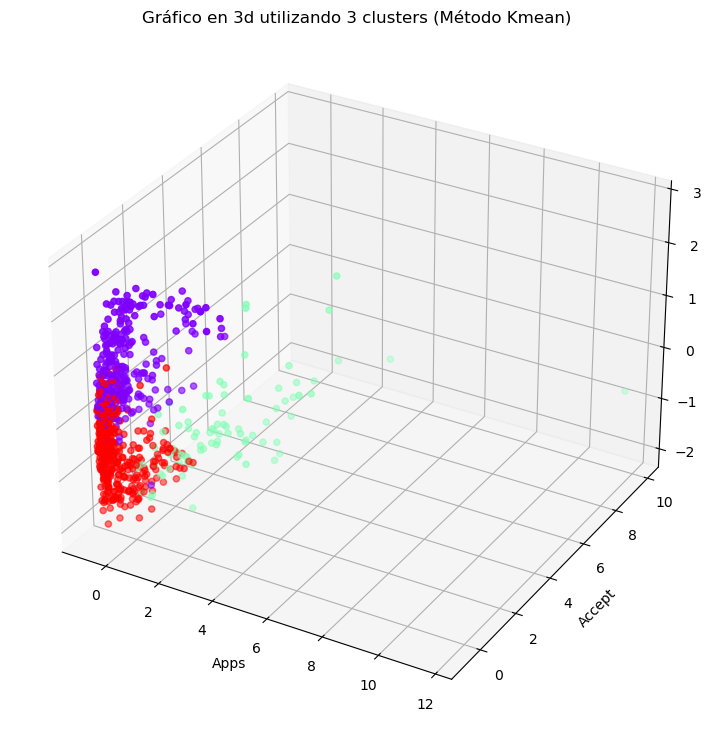

In [368]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (18,9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(zscore_df.Apps,
           zscore_df.Accept,
           zscore_df.Outstate,
           c= cluster_kmeans3c.Cluster ,
           cmap='rainbow')
ax.set_xlabel('Apps')
ax.set_ylabel('Accept')
ax.set_zlabel('Outstate')
ax.set_title('Gráfico en 3d utilizando 3 clusters (Método Kmean)')

## K-means  con 4 clusters

Text(0.5, 0.92, 'Gráfico en 3d utilizando 4 clusters (Método Kmean)')

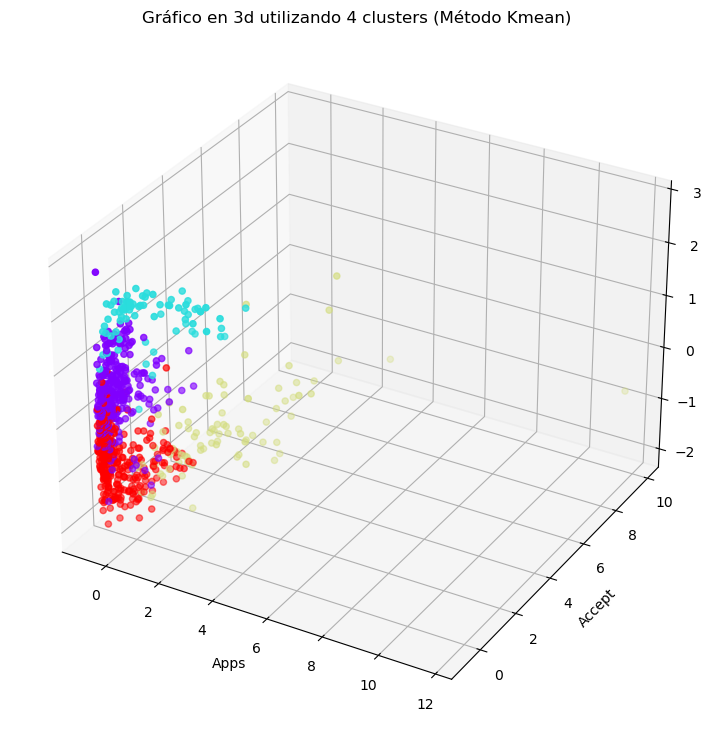

In [369]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (18,9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(zscore_df.Apps,
           zscore_df.Accept,
           zscore_df.Outstate,
           c= cluster_kmeans4c.Cluster ,
           cmap='rainbow')
ax.set_xlabel('Apps')
ax.set_ylabel('Accept')
ax.set_zlabel('Outstate')
ax.set_title('Gráfico en 3d utilizando 4 clusters (Método Kmean)')

## K-means  con 5 clusters

Text(0.5, 0.92, 'Gráfico en 3d utilizando 5 clusters (Método Kmean)')

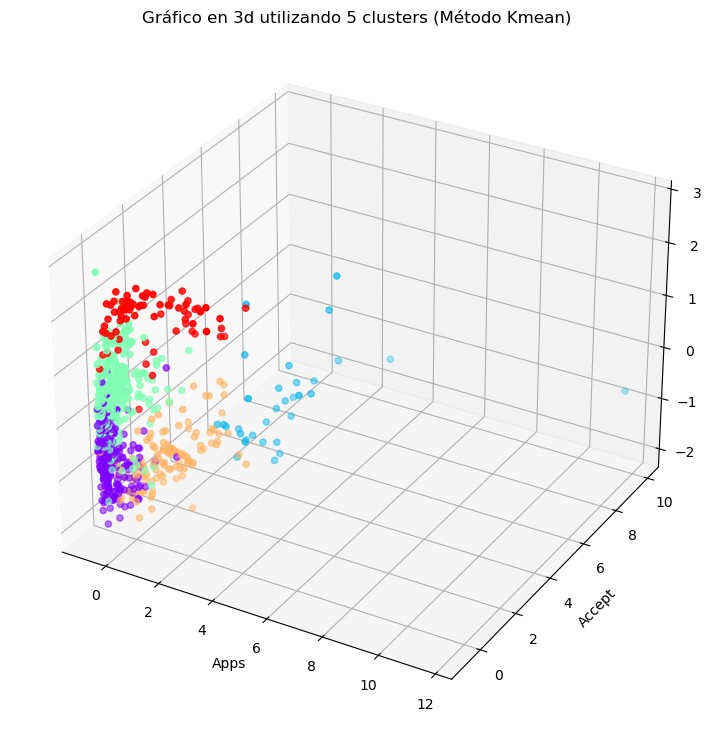

In [370]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (18,9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(zscore_df.Apps,
           zscore_df.Accept,
           zscore_df.Outstate,
           c= cluster_kmeans5c.Cluster ,
           cmap='rainbow')
ax.set_xlabel('Apps')
ax.set_ylabel('Accept')
ax.set_zlabel('Outstate')
ax.set_title('Gráfico en 3d utilizando 5 clusters (Método Kmean)')

## MÉTRICA DE SILUETA PROBAR Y COMPARAR CON 3 ,4 Y 5 CLUSTER

### Métrica de Silueta  (con Método de K-means)

In [371]:
from sklearn.metrics import silhouette_score  
silhouette_score(Collegec.values, cluster_kmeans3c.Cluster, metric='euclidean') # con 3 clusters

0.32145155038925416

In [372]:
from sklearn.metrics import silhouette_score
silhouette_score(Collegec.values, cluster_kmeans4c.Cluster, metric='euclidean') # con 4 clusters

0.24077135790375345

In [373]:
from sklearn.metrics import silhouette_score
silhouette_score(Collegec.values, cluster_kmeans5c.Cluster, metric='euclidean') # con 5 clusters

0.23387757623016395

# Segun la metrica de silueta obtenidos con 3,4 y 5 utilizando el metodo de cluster Kmeans  el mejor número de clústeres para el conjunto de datos es 3.